In [65]:
import pandas as pd

base = pd.read_csv('base.csv')
detailed = pd.read_csv('detailed.csv')
cot = pd.read_csv('cot.csv')
few = pd.read_csv('few.csv')
df_list = [base, detailed, few, cot]
df_list_name = ["Base", "Detailed", "Few Shot", "Chain-of-Thought"]
few['Log_Probability'] = pd.to_numeric(few['Log_Probability'])
cot['Log_Probability'] = pd.to_numeric(cot['Log_Probability'])
detailed['Log_Probability'] = pd.to_numeric(detailed['Log_Probability'])
base['Log_Probability'] = pd.to_numeric(base['Log_Probability'])

In [68]:
import math

def shannon_entropy(string):
    """Calculate the Shannon entropy of a string"""
    if not string:  # Check if the string is empty
        return 0  # Return 0 for empty strings

    freq = [str(string).count(c) / len(str(string)) for c in set(str(string))]
    entropy = -sum(f * math.log2(f) for f in freq if f != 0)  # Exclude zero frequencies

    return entropy

few['entropy'] = few['Answer'].apply(shannon_entropy)
cot['entropy'] = cot['Answer'].apply(shannon_entropy)
detailed['entropy'] = detailed['Answer'].apply(shannon_entropy)
base['entropy'] = base['Answer'].apply(shannon_entropy)


In [69]:
import matplotlib.pyplot as plt

averages = pd.DataFrame({
    'Dataset': df_list_name,
    'Average Log Probability': [df['Log_Probability'].mean() for df in df_list],
    'Average Accuracy': [100*df['Accuracy'].mean() for df in df_list],
     'Average Token Length': [df['Token_Length'].mean() for df in df_list],
          'Average Entropy': [df['entropy'].mean() for df in df_list],
         'Median Entropy': [df['entropy'].median() for df in df_list],
    'Median Log Probability': [df['Log_Probability'].median() for df in df_list],
     'Median Token Length': [df['Token_Length'].median() for df in df_list],
})

averages

,Dataset,Average Log Probability,Average Accuracy,Average Token Length,Average Entropy,Median Entropy,Median Log Probability,Median Token Length
0,Base,-0.501546,16.0,90.839,4.016281,4.256885,-0.443294,48.0
1,Detailed,-0.546859,15.9,90.170,4.096361,4.280379,-0.492613,54.5
2,Few Shot,-0.599473,13.3,90.408,4.025114,4.275706,-0.520645,56.0
3,Chain-of-Thought,-0.621641,16.6,73.508,3.973119,4.251865,-0.550453,46.0


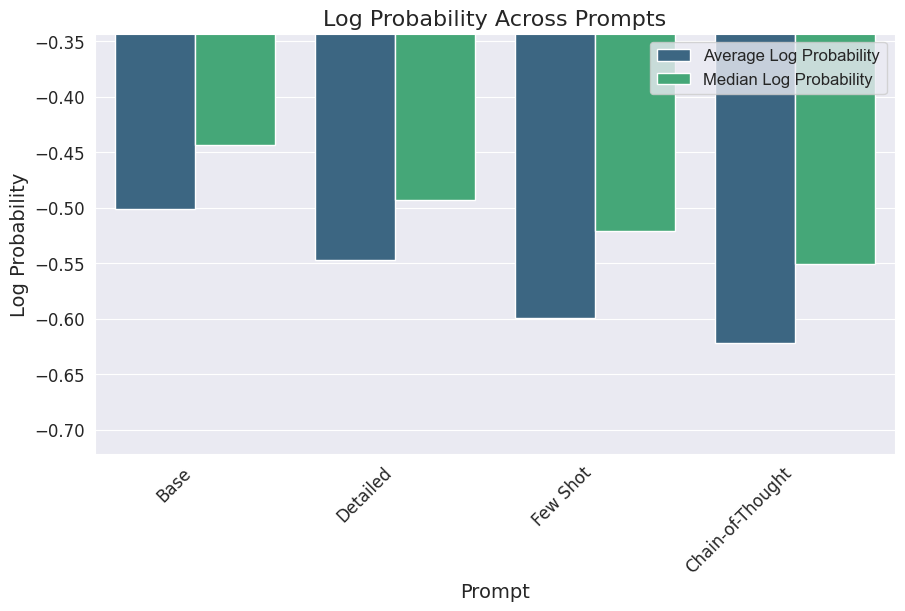

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the font family and size
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12

# Melt the data to create a long format for plotting
data = pd.melt(averages, id_vars=['Dataset'], value_vars=['Average Log Probability', 'Median Log Probability'], var_name='Metric', value_name='Log Probability')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')

# Set the plot style
sns.set_style("darkgrid")

# Create the bar plot
sns.barplot(x='Dataset', y='Log Probability', hue='Metric', data=data, palette='viridis', ax=ax)

# Set the plot title and axis labels
ax.set_title('Log Probability Across Prompts', fontsize=16)
ax.set_xlabel('Prompt', fontsize=14)
ax.set_ylabel('Log Probability', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the y-axis limits to fit the data range
ax.set_ylim(min(data['Log Probability']) - 0.1, max(data['Log Probability']) + 0.1)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add some spacing between the plot and the axes
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)
fig.patch.set_alpha(0.0)

plt.show()

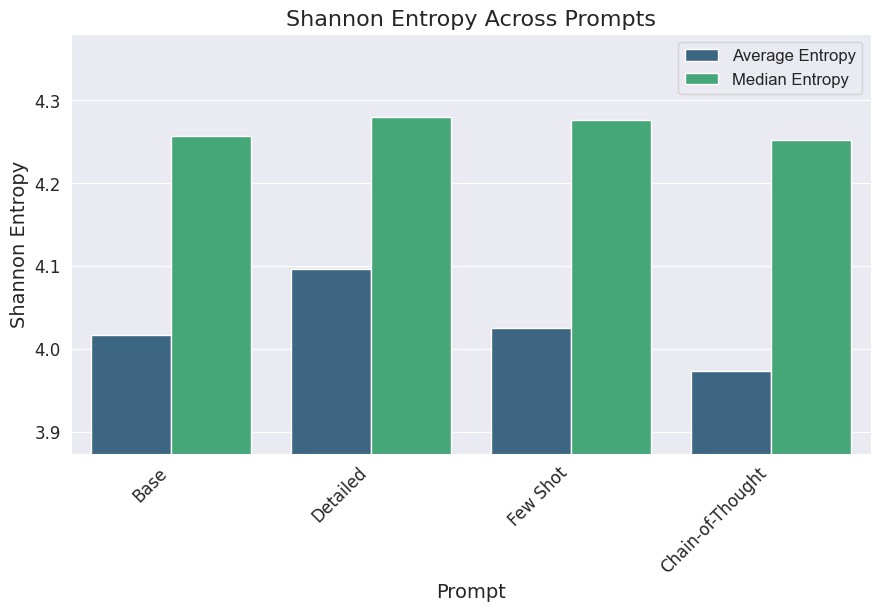

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the font family and size
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12

# Melt the data to create a long format for plotting
data = pd.melt(averages, id_vars=['Dataset'], value_vars=['Average Entropy', 'Median Entropy'], var_name='Metric', value_name='Shannon Entropy')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')

# Set the plot style
sns.set_style("darkgrid")

# Create the bar plot
sns.barplot(x='Dataset', y='Shannon Entropy', hue='Metric', data=data, palette='viridis', ax=ax)

# Set the plot title and axis labels
ax.set_title('Shannon Entropy Across Prompts', fontsize=16)
ax.set_xlabel('Prompt', fontsize=14)
ax.set_ylabel('Shannon Entropy', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the y-axis limits to fit the data range
ax.set_ylim(min(data['Shannon Entropy']) - 0.1, max(data['Shannon Entropy']) + 0.1)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add some spacing between the plot and the axes
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)
fig.patch.set_alpha(0.0)

plt.show()

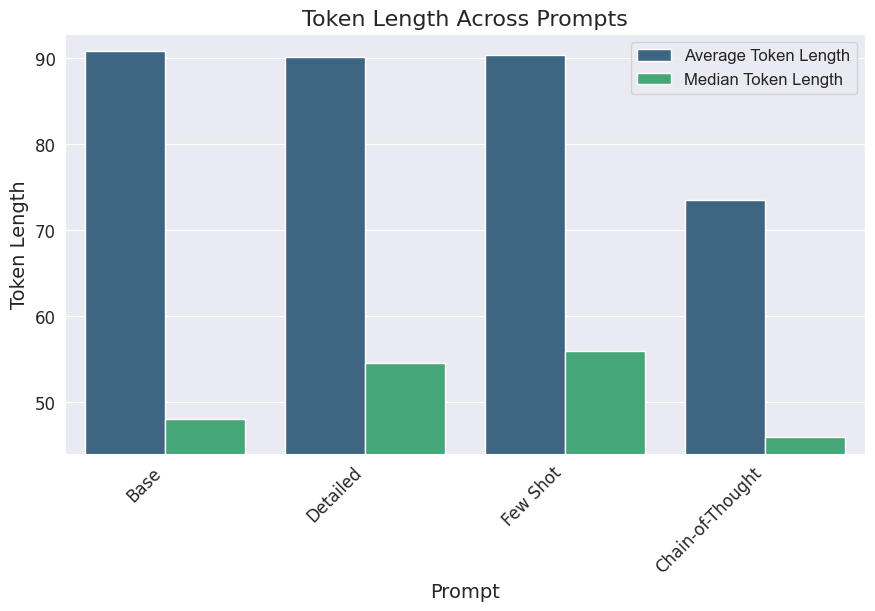

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the font family and size
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12

# Melt the data to create a long format for plotting
data = pd.melt(averages, id_vars=['Dataset'], value_vars=['Average Token Length', 'Median Token Length'], var_name='Metric', value_name='Token Length')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')

# Set the plot style
sns.set_style("darkgrid")

# Create the bar plot
sns.barplot(x='Dataset', y='Token Length', hue='Metric', data=data, palette='viridis', ax=ax)

# Set the plot title and axis labels
ax.set_title('Token Length Across Prompts', fontsize=16)
ax.set_xlabel('Prompt', fontsize=14)
ax.set_ylabel('Token Length', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the y-axis limits to fit the data range
ax.set_ylim(min(data['Token Length']) - 2, max(data['Token Length']) + 2)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add some spacing between the plot and the axes
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)
fig.patch.set_alpha(0.0)

plt.show()

/var/folders/yn/wpx1g2g117z07vpq8_h3j_5r0000gn/T/ipykernel_35512/165188634.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Average Accuracy', data=averages, palette='viridis', ax=ax)


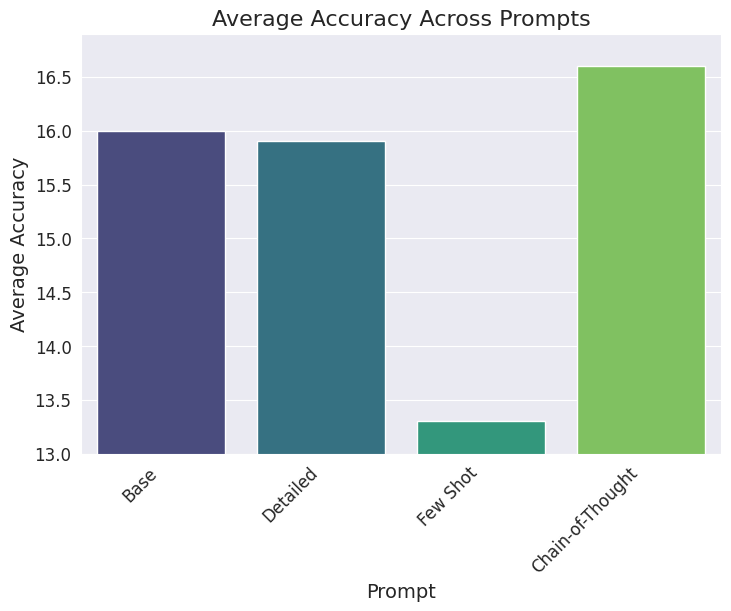

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family and size
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')

# Set the plot style
sns.set_style("darkgrid")

# Create the bar plot
sns.barplot(x='Dataset', y='Average Accuracy', data=averages, palette='viridis', ax=ax)

# Set the plot title and axis labels
ax.set_title('Average Accuracy Across Prompts', fontsize=16)
ax.set_xlabel('Prompt', fontsize=14)
ax.set_ylabel('Average Accuracy', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the y-axis limits to fit the data range
ax.set_ylim(min(averages['Average Accuracy']) - 0.3, max(averages['Average Accuracy']) + 0.3)

# Add some spacing between the plot and the axes
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)
fig.patch.set_alpha(0.0)

plt.show()

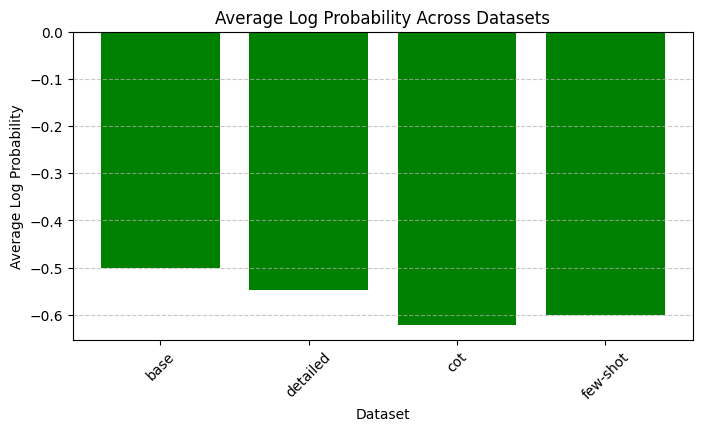

In [53]:
plt.figure(figsize=(8, 4))
plt.bar(averages['Dataset'], averages['Average Log Probability'], color='green')
plt.title('Average Log Probability Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Average Log Probability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family and size
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# Set the plot style
sns.set_style("darkgrid")

# Create the bar plot
sns.barplot(x='Dataset', y='Average Log Probability', data=averages, palette='viridis', ax=ax)

# Set the plot title and axis labels
ax.set_title('Average Accuracy Across Datasets', fontsize=16)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_ylabel('Average Accuracy', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the y-axis limits to fit the data range
ax.set_ylim(min(averages['Average Log Probability']) - 0.1, max(averages['Average Log Probability']) + 0.1)

# Add some spacing between the plot and the axes
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

plt.show()

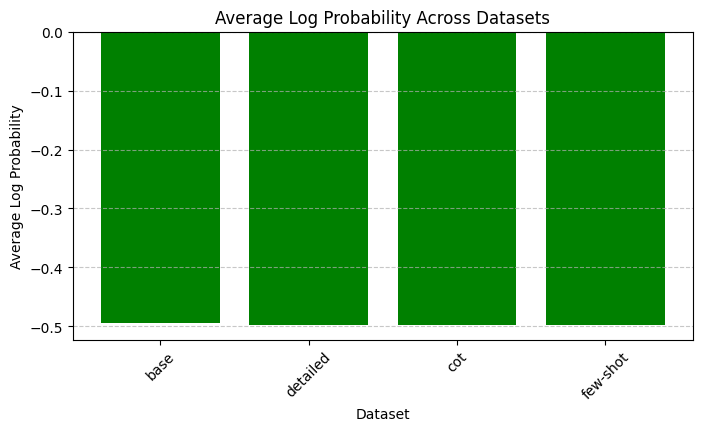

In [23]:
plt.figure(figsize=(8, 4))
plt.bar(averages['Dataset'], averages['Average Log Probability'], color='green')
plt.title('Average Log Probability Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Average Log Probability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()